## Bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

## Simulering

### IV-kurve og transkonduktans

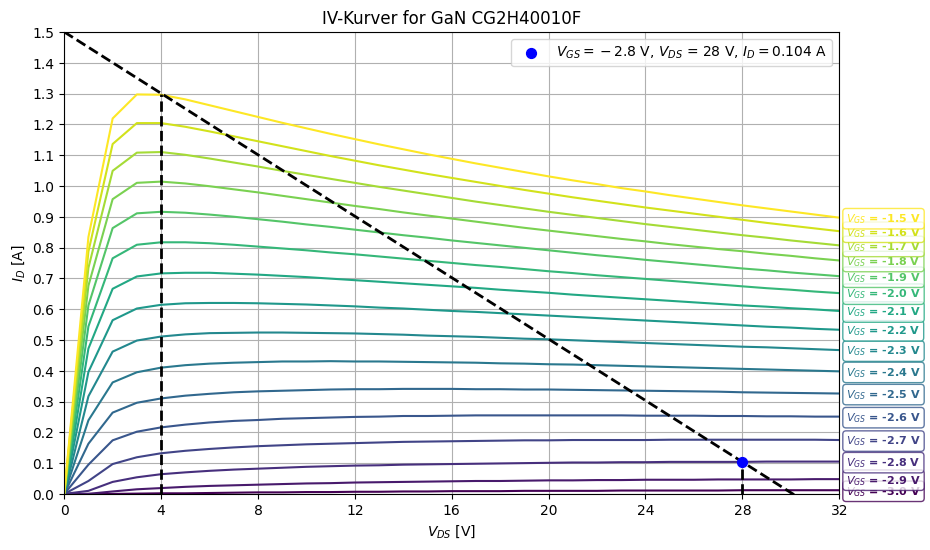

In [67]:
# Load IV data
IV_kurve01 = np.loadtxt('Data/Simulering/IV_kurve01.csv', delimiter=',', skiprows=16)
IV_kurve01 = pd.DataFrame(IV_kurve01, columns=['VGS', 'VDS', 'ID'])

# Create a colormap
unique_vgs = IV_kurve01['VGS'].unique()
IV_cmap = plt.get_cmap('viridis', len(unique_vgs))


# Find the drain current at VGS = -2.8 V and VDS = 28 V
i_point = IV_kurve01[(IV_kurve01['VGS'] == -2.8) & (IV_kurve01['VDS'] == 28)]['ID'].values[0]

# Define the linear function
def linear_function(x):
    slope = (i_point - 1.5) / 28
    intercept = 1.5
    return slope * x + intercept

# Generate x values and corresponding y values using the linear function
x_values = np.linspace(0, 32, 100)
y_values = linear_function(x_values)


# Plot IV curves for different VGS values
plt.figure(figsize=(10, 6))
for i, vgs in enumerate(unique_vgs):
    subset = IV_kurve01[IV_kurve01['VGS'] == vgs]
    plt.plot(subset['VDS'], subset['ID'], color=IV_cmap(i))
    # Annotate the endpoint of each curve with the VGS value
    props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor=IV_cmap(i))
    plt.annotate('$V_{GS}$ = '+f'{vgs} V', xy=(subset['VDS'].iloc[-1], subset['ID'].iloc[-1]),
                 xytext=(5, -3), textcoords='offset points', bbox=props, fontsize=8, fontweight='bold', color=IV_cmap(i))

plt.plot(x_values, y_values, color='k', linestyle='--', linewidth=2)

plt.plot([28, 28], [0, i_point], color='k', linestyle='--', linewidth=2)
plt.plot([4, 4], [0, 1.3], color='k', linestyle='--', linewidth=2)

plt.scatter(28, i_point, color='b', s=50, zorder=10, label='$V_{GS} = -2.8$ V, $V_{DS}$ = 28 V, ' + f'$I_D = {i_point:.3f}$ A')

plt.xlabel('$V_{DS}$ [V]')
plt.ylabel('$I_D$ [A]')
plt.title('IV-Kurver for GaN CG2H40010F')

plt.xlim(0, 32)
plt.ylim(0, 1.5)
plt.yticks(np.arange(0,1.6,0.1))
plt.xticks(np.arange(0,32.1,4))
plt.grid(True)
plt.legend()
plt.show()


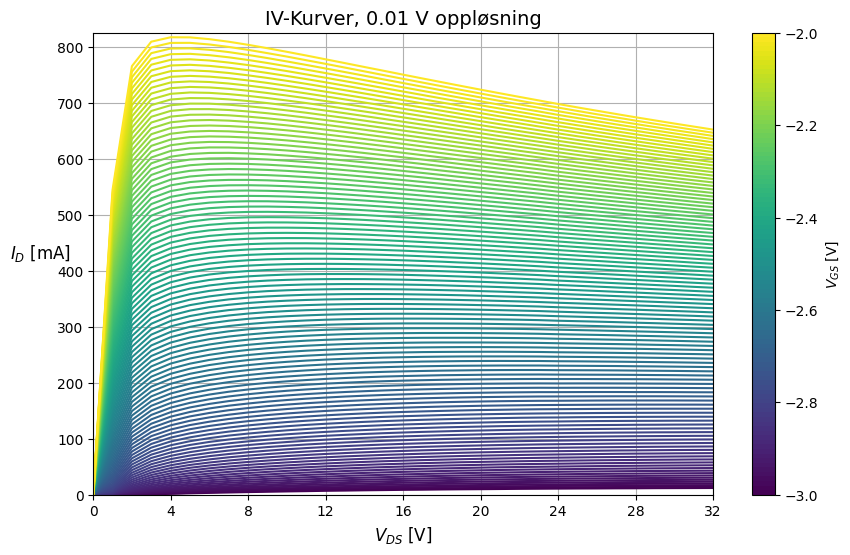

In [64]:
# Load IV data
IV_kurve = np.loadtxt('Data/Simulering/IV_kurve.csv', delimiter=',', skiprows=17)
IV_kurve = pd.DataFrame(IV_kurve, columns=['VGS', 'VDS', 'ID'])

# Convert current from A to mA
IV_kurve['ID'] = IV_kurve['ID'] * 1000

# Create a colormap
unique_vgs = IV_kurve['VGS'].unique()
norm = mcolors.Normalize(vmin=unique_vgs.min(), vmax=unique_vgs.max())  # Normalize the VGS values
IV_cmap = plt.get_cmap('viridis', len(unique_vgs))

# Plot IV curves for different VGS values
fig, ax = plt.subplots(figsize=(10, 6))

for i, vgs in enumerate(unique_vgs):
    subset = IV_kurve[IV_kurve['VGS'] == vgs]
    ax.plot(subset['VDS'], subset['ID'], color=IV_cmap(norm(vgs)))  # Use normalized VGS for color

# Add colorbar for the VGS values
sm = cm.ScalarMappable(cmap=IV_cmap, norm=norm)  # Create ScalarMappable for the colorbar
sm.set_array([])  # Set array to allow ScalarMappable to work
cbar = plt.colorbar(sm, ax=ax, label='$V_{GS}$ [V]')  # Add the colorbar linked to the plot

# Set x-ticks and labels
ax.set_xticks(np.arange(0, 32.1, 4))
ax.set_xlabel('$V_{DS}$ [V]', fontsize=12)
ax.set_ylabel('$I_{D}$ [mA]', fontsize=12, labelpad=12, rotation=0)
ax.set_title('IV-Kurver, 0.01 V oppløsning', fontsize=14)
ax.set_xlim(0, 32)
ax.set_ylim(0, 825)

# Add grid and show the plot
ax.grid(True)
plt.show()


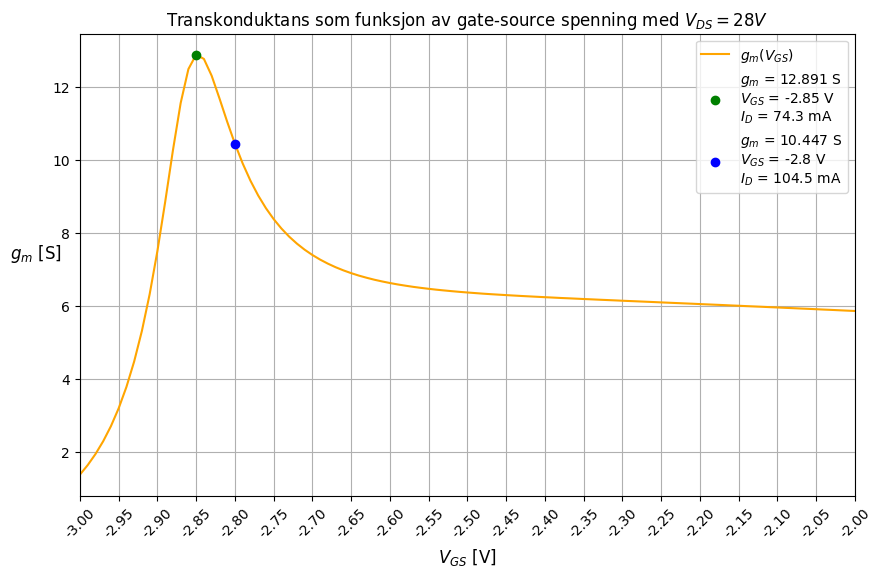

In [4]:
# Load transkonduktans data
Transkonduktans = np.loadtxt('Data/Simulering/Transkonduktans28V.csv', delimiter=',', skiprows=11)
Transkondutans = pd.DataFrame(Transkonduktans, columns=['VGS', 'Gm'])

max_gm_idx = Transkondutans['Gm'].idxmax()
max_gm = Transkondutans.loc[max_gm_idx]
max_ID = IV_kurve[IV_kurve['VGS'] == max_gm['VGS']]['ID'].max()

max_gm_idx = Transkondutans['Gm'].idxmax()
max_gm = Transkondutans.loc[max_gm_idx]
max_ID = IV_kurve[IV_kurve['VGS'] == max_gm['VGS']]['ID'].max()

gm_2_8 = Transkondutans[Transkondutans['VGS'] == -2.8]['Gm'].values[0]
id_2_8 = IV_kurve[(IV_kurve['VGS'] == -2.8) & (IV_kurve['VDS'] == 28)]['ID'].values[0]

plt.figure(figsize=(10, 6))

plt.plot(Transkondutans['VGS'], Transkondutans['Gm'], color='orange', label=f'$g_m(V_{{GS}})$')

plt.scatter(max_gm['VGS'], max_gm['Gm'], marker='o' , color='g', label=f'$g_m$ = {max_gm["Gm"]:.3f} S\n$V_{{GS}}$ = {max_gm["VGS"]:.2f} V \n$I_D$ = {max_ID:.1f} mA', zorder=5)
plt.scatter(-2.8, gm_2_8, marker='o', color='b', label=f'$g_m$ = {gm_2_8:.3f} S\n$V_{{GS}}$ = -2.8 V \n$I_D$ = {id_2_8:.1f} mA', zorder=5)

plt.xlabel('$V_{GS}$ [V]', fontsize=12)
plt.ylabel('$g_m$ [S]', fontsize=12, labelpad=12, rotation=0)
plt.title('Transkonduktans som funksjon av gate-source spenning med $V_{DS} = 28 V$')
plt.grid(True)
plt.xticks(np.arange(-3, -2+0.01, 0.05), rotation=45)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.legend()
plt.xlim(-3, -2)
plt.show()

### S21 og stabilitet

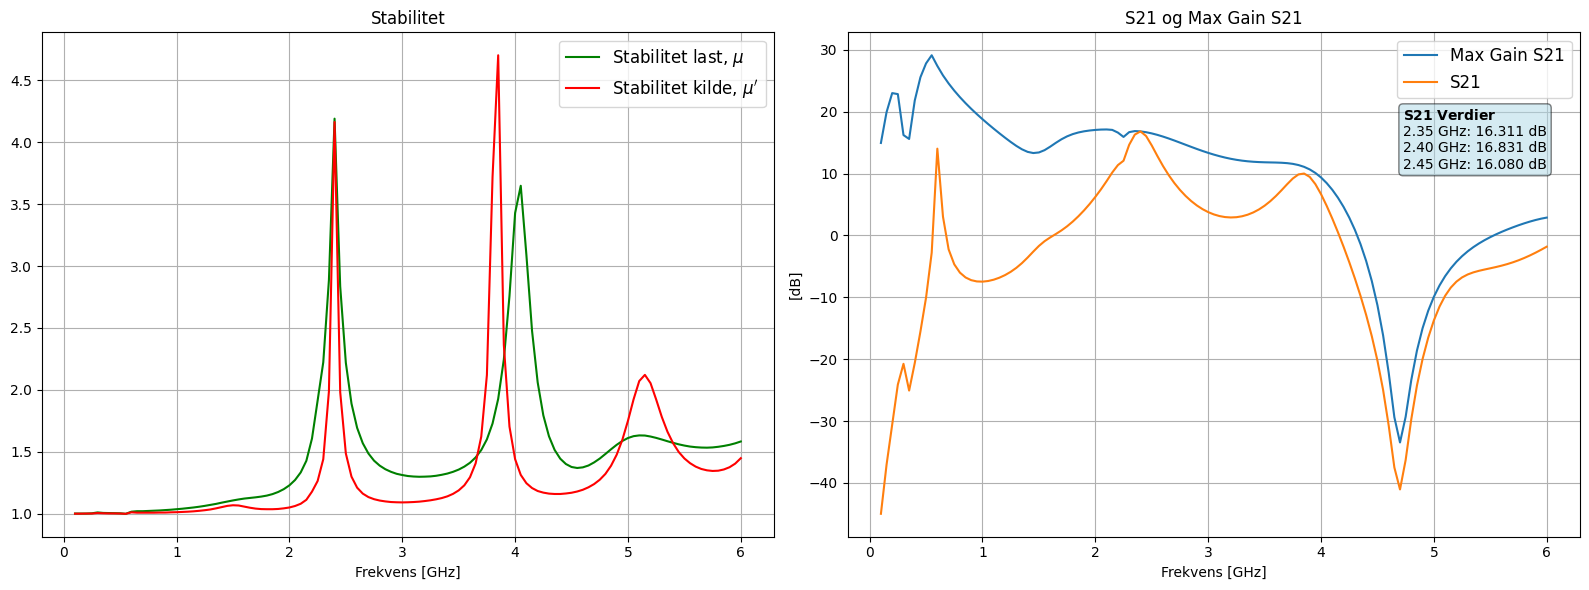

In [5]:
stabilitet = np.loadtxt('Data/Simulering/stab_factor.csv', delimiter=',',skiprows=16)
stabilitet = pd.DataFrame(stabilitet, columns=['Frekvens', 'Stabilitet last', 'Stabilitet kilde'])

MAG_S21 = np.loadtxt('Data/Simulering/MAG_S21.csv', delimiter=',',skiprows=16)
MAG_S21 = pd.DataFrame(MAG_S21, columns=['Frekvens', 'Mag', 'S21'])

stabilitet['Frekvens'] = stabilitet['Frekvens'] / 1e9
MAG_S21['Frekvens'] = MAG_S21['Frekvens'] / 1e9


freqs = [2.35, 2.40, 2.45]
s21_values = {freq: MAG_S21.loc[MAG_S21['Frekvens'] == freq, 'S21'].values[0] for freq in freqs}

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Stabilitet last and Stabilitet kilde
axs[0].plot(stabilitet['Frekvens'], stabilitet['Stabilitet last'], color='g', label=r'Stabilitet last, $\mu$')
axs[0].plot(stabilitet['Frekvens'], stabilitet['Stabilitet kilde'],color='r', label=r'Stabilitet kilde, $\mu^{\prime}$')
axs[0].set_xlabel('Frekvens [GHz]')
axs[0].legend(fontsize=12)
axs[0].grid(True)
axs[0].title.set_text('Stabilitet')

# Plot MAG_S21
axs[1].plot(MAG_S21['Frekvens'], MAG_S21['Mag'], label='Max Gain S21')
axs[1].plot(MAG_S21['Frekvens'], MAG_S21['S21'], label='S21')
axs[1].set_xlabel('Frekvens [GHz]')
axs[1].set_ylabel('[dB]')
axs[1].legend(fontsize=12)
axs[1].grid(True)
axs[1].title.set_text('S21 og Max Gain S21')

# Annotate the S21 values in a box right under the legend
textstr = r'$\mathbf{S21\ Verdier}$' + '\n'+ '\n'.join([f'{freq:.2f} GHz: {s21_values[freq]:.3f} dB' for freq in freqs])
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
axs[1].text(0.955, 0.85, textstr, transform=axs[1].transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props, multialignment='left')

# Show plot
plt.tight_layout()
plt.show()

### 1-tone HB

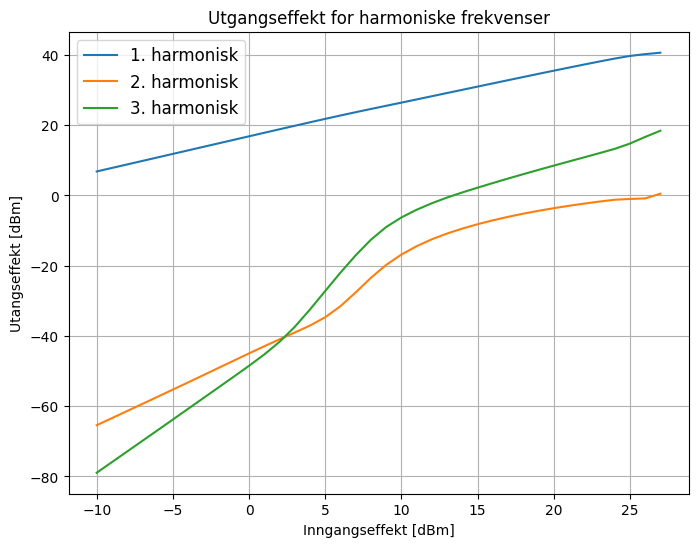

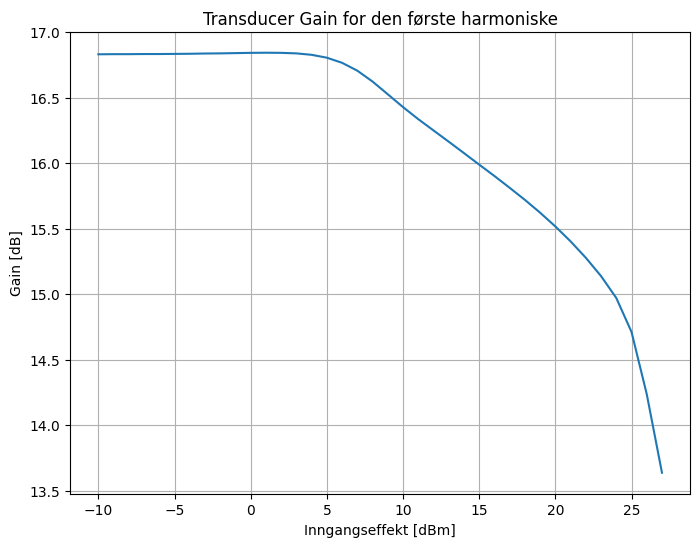

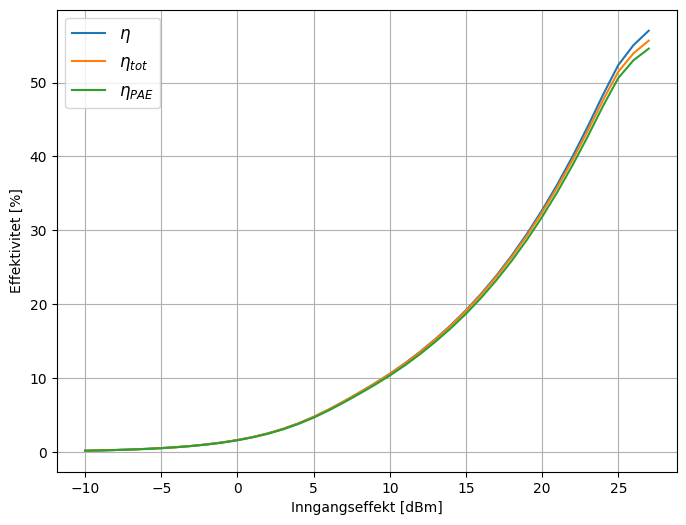

In [6]:
P_ut = np.loadtxt('Data/Simulering/Put.csv', delimiter=',',skiprows=21)
P_ut = pd.DataFrame(P_ut, columns=['P_in', 'P_ut1', 'P_ut2', 'P_ut3'])

TransGain = np.loadtxt('Data/Simulering/TransGain.csv', delimiter=',',skiprows=11)
TransGain = pd.DataFrame(TransGain, columns=['P_in', 'Gain'])

Effektivitet = np.loadtxt('Data/Simulering/Effektivitet.csv', delimiter=',',skiprows=21)
Effektivitet = pd.DataFrame(Effektivitet, columns=['P_in', 'DrainEff', 'TotalEff', 'PAE'])


plt.figure(figsize=(8, 6))
plt.plot(P_ut['P_in'], P_ut['P_ut1'], label='1. harmonisk')
plt.plot(P_ut['P_in'], P_ut['P_ut2'], label='2. harmonisk')
plt.plot(P_ut['P_in'], P_ut['P_ut3'], label='3. harmonisk')
plt.xlabel('Inngangseffekt [dBm]')
plt.ylabel('Utangseffekt [dBm]')
plt.legend(fontsize=12)
plt.title('Utgangseffekt for harmoniske frekvenser')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(TransGain['P_in'], TransGain['Gain'])
plt.xlabel('Inngangseffekt [dBm]')
plt.ylabel('Gain [dB]')
plt.title('Transducer Gain for den første harmoniske')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(Effektivitet['P_in'], Effektivitet['DrainEff'], label=r'$\eta$')
plt.plot(Effektivitet['P_in'], Effektivitet['TotalEff'], label=r'$\eta_{tot}$')
plt.plot(Effektivitet['P_in'], Effektivitet['PAE'], label=r'$\eta_{PAE}$')
plt.xlabel('Inngangseffekt [dBm]')
plt.ylabel('Effektivitet [%]')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


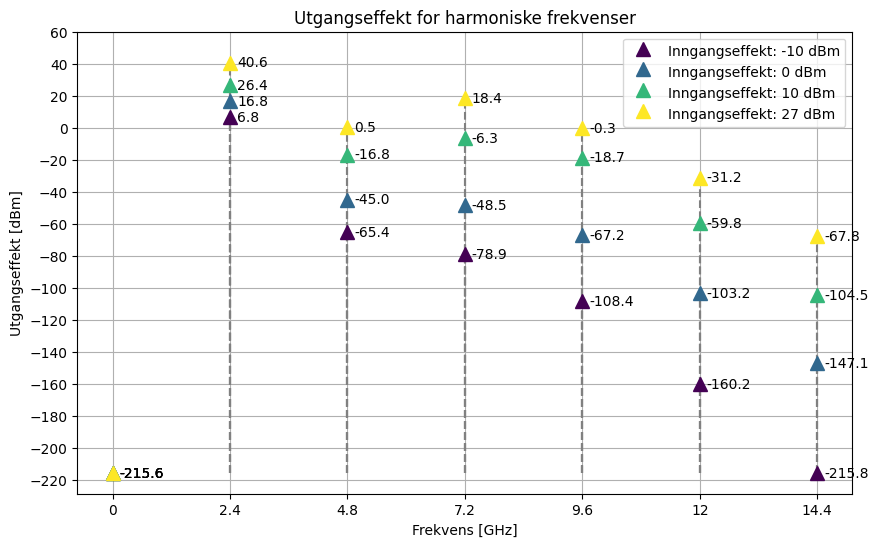

In [7]:
# Load the data
Spektrum = np.loadtxt('Data/Simulering/Spektrum1Tone.csv', delimiter=',', skiprows=16)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(Spektrum, columns=['P_in', 'Frequency', 'Value'])

# Define the harmonics of 2.4 GHz
harmonic_frequencies = [0, 2.4, 4.8, 7.2, 9.6, 12, 14.4]  # GHz

# Initialize a new DataFrame to store the reshaped data
Spektrum1Tone = pd.DataFrame(columns=['P_in', 'DC', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6'])

# Group by P_in and reshape the data
for p_in, group in df.groupby('P_in'):
    row = [p_in] + [np.nan] * len(harmonic_frequencies)
    for i, harmonic in enumerate(harmonic_frequencies):
        value = group.loc[group['Frequency'] == harmonic * 1e9, 'Value'].values
        row[i + 1] = value[0] if len(value) > 0 else np.nan
    Spektrum1Tone.loc[len(Spektrum1Tone)] = row


min_value = Spektrum1Tone.iloc[:, 1:].min().min()
max_value = Spektrum1Tone.iloc[:, 1:].max().max()
step=20

# Desired input power values
Power_values = [-10, 0, 10, 27]  # dBm
cmap = plt.get_cmap('viridis', len(Power_values))

# Plot the spectral lines at the desired input power
plt.figure(figsize=(10, 6))
for i, Power in enumerate(Power_values):
    idx = (Spektrum1Tone['P_in'] == Power)
    markerline, stemlines, baseline = plt.stem(
        harmonic_frequencies, 
        Spektrum1Tone.loc[idx].values[0][1:], 
        linefmt='--', 
        markerfmt='^', 
        basefmt=' ', 
        label=f'Inngangseffekt: {Power} dBm',
        bottom=min_value,
    )
    plt.setp(markerline, 'zorder', 3, 'markersize', 10, 'color', cmap(i))  # Set marker z-order, size, and color
    plt.setp(stemlines, 'zorder', 2, 'color', 'gray')   # Set stem line z-order and color
    plt.setp(baseline, 'zorder', 1)  # Set baseline z-order

    for x, y in zip(harmonic_frequencies, Spektrum1Tone.loc[idx].values[0][1:]):
        plt.annotate(f'{y:.1f}', xy=(x, y), xytext=(5, -3), textcoords='offset points', fontsize=10, color='black')

plt.xticks(harmonic_frequencies, [f'{freq}' for freq in harmonic_frequencies]) 
plt.yticks(np.arange(np.floor(min_value / step) * step, np.ceil(max_value / step) * step + 1, step))
plt.xlabel('Frekvens [GHz]')
plt.ylabel('Utgangseffekt [dBm]')
plt.title('Utgangseffekt for harmoniske frekvenser')
plt.legend()
plt.grid(True)
plt.show()

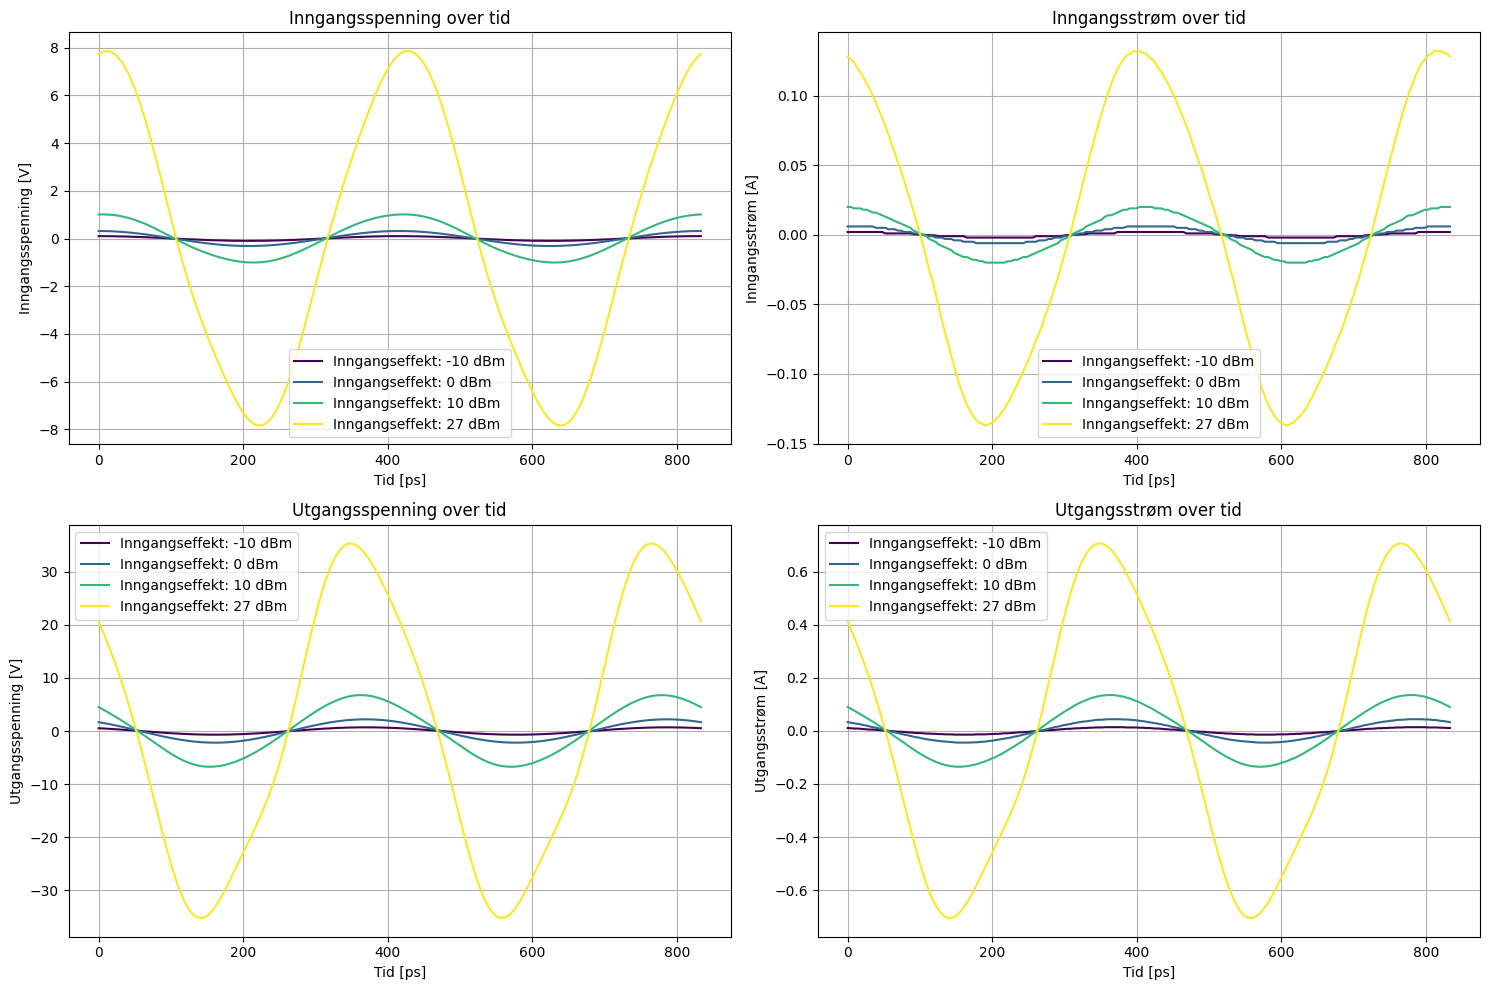

In [8]:
Tidsserier1Tone = np.loadtxt('Data/Simulering/Tidsserier1Tone.csv', delimiter=',', skiprows=31)
Tidsserier1Tone = pd.DataFrame(Tidsserier1Tone, columns=['P_in', 'Time', 'V_in', 'I_in', 'V_out', 'I_out'])

# Convert Time to picoseconds
Tidsserier1Tone['Time'] = Tidsserier1Tone['Time'] * 1e12

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot V_in versus Time
for i, Power in enumerate(Power_values):
    subset = Tidsserier1Tone[Tidsserier1Tone['P_in'] == Power]
    axs[0, 0].plot(subset['Time'], subset['V_in'], label=f'Inngangseffekt: {Power} dBm', color=cmap(i))
axs[0, 0].set_xlabel('Tid [ps]')
axs[0, 0].set_ylabel('Inngangsspenning [V]')
axs[0, 0].set_title('Inngangsspenning over tid')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot I_in versus Time
for i, Power in enumerate(Power_values):
    subset = Tidsserier1Tone[Tidsserier1Tone['P_in'] == Power]
    axs[0, 1].plot(subset['Time'], subset['I_in'], label=f'Inngangseffekt: {Power} dBm', color=cmap(i))
axs[0, 1].set_xlabel('Tid [ps]')
axs[0, 1].set_ylabel('Inngangsstrøm [A]')
axs[0, 1].set_title('Inngangsstrøm over tid')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot V_out versus Time
for i, Power in enumerate(Power_values):
    subset = Tidsserier1Tone[Tidsserier1Tone['P_in'] == Power]
    axs[1, 0].plot(subset['Time'], subset['V_out'], label=f'Inngangseffekt: {Power} dBm', color=cmap(i))
axs[1, 0].set_xlabel('Tid [ps]')
axs[1, 0].set_ylabel('Utgangsspenning [V]')
axs[1, 0].set_title('Utgangsspenning over tid')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot I_out versus Time
for i, Power in enumerate(Power_values):
    subset = Tidsserier1Tone[Tidsserier1Tone['P_in'] == Power]
    axs[1, 1].plot(subset['Time'], subset['I_out'], label=f'Inngangseffekt: {Power} dBm', color=cmap(i))
axs[1, 1].set_xlabel('Tid [ps]')
axs[1, 1].set_ylabel('Utgangsstrøm [A]')
axs[1, 1].set_title('Utgangsstrøm over tid')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

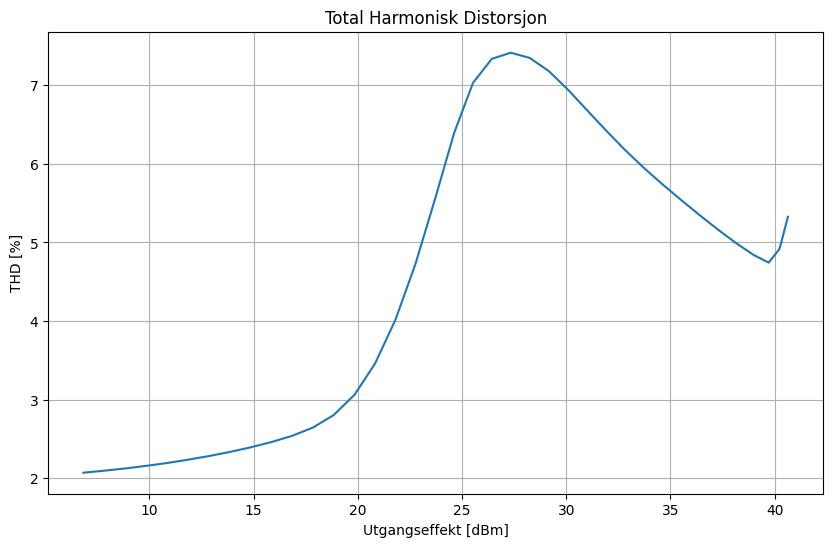

In [9]:
THD = np.loadtxt('Data/Simulering/THD1Tone.csv', delimiter=',', skiprows=11)
THD = pd.DataFrame(THD, columns=['P_ut', 'THD'])

plt.figure(figsize=(10, 6))
plt.plot(THD['P_ut'], THD['THD'])
plt.xlabel('Utgangseffekt [dBm]')
plt.ylabel('THD [%]')
plt.title('Total Harmonisk Distorsjon')
plt.grid(True)

### 2-Tone HB

In [10]:
## 123ABC